<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/bigdata3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import library yang dibutuhkan

import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/indonesiagelap.csv')
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1892174300939169883,Thu Feb 20 06:47:07 +0000 2025,0,@O5Bravo Indonesia gelap https://t.co/KoZPIKZxly,1892465991667613791,https://pbs.twimg.com/media/GkNjylMbUAQkG1i.jpg,O5Bravo,in,"Kota Medan, Sumatera Utara",0,0,0,https://x.com/Syaifud30457221/status/189246599...,992735968200347649,Syaifud30457221
1,1892349703255171301,Thu Feb 20 06:46:20 +0000 2025,0,@OposisiCerdas Indonesia gelap https://t.co/fE...,1892465796645081518,https://pbs.twimg.com/media/GkNjnQ7bcAA3z1r.jpg,OposisiCerdas,in,"Kota Medan, Sumatera Utara",0,0,0,https://x.com/Syaifud30457221/status/189246579...,992735968200347649,Syaifud30457221
2,1892451406675849658,Thu Feb 20 06:45:53 +0000 2025,0,@XtremeMerch RILIS ULANG GANTI LIRIK JADI BAYA...,1892465681217597598,NaN,XtremeMerch,in,NaN,0,0,0,https://x.com/Brahim_maldini/status/1892465681...,1543066357,Brahim_maldini
3,1892465605170565464,Thu Feb 20 06:45:35 +0000 2025,1,Indonesia Gelap,1892465605170565464,NaN,NaN,in,NaN,0,0,0,https://x.com/msafarnurhan/status/189246560517...,1728037974020141056,msafarnurhan
4,1892202844771803588,Thu Feb 20 06:45:27 +0000 2025,0,@tempodotco Indonesia gelap Krn pa Luhut 10 ta...,1892465573973381241,NaN,tempodotco,in,NaN,0,0,0,https://x.com/AryaZulvikar/status/189246557397...,1449053263,AryaZulvikar


In [3]:
#pilih attribut mana saja yang akan di ambil
df = df[['full_text']]
df

,full_text
0,@O5Bravo Indonesia gelap https://t.co/KoZPIKZxly
1,@OposisiCerdas Indonesia gelap https://t.co/fE...
2,@XtremeMerch RILIS ULANG GANTI LIRIK JADI BAYA...
3,Indonesia Gelap
4,@tempodotco Indonesia gelap Krn pa Luhut 10 ta...
...,...
99,@merapi_uncover Indonesia gelap
100,@nayvigasi siapa kurang nyaman by? mang ada ya...
101,Menuju INDONESIA GELAP. Orang Pintar kalah sam...
102,Demo Indonesia gelap oleh Mahasiswa. Benarkah ...


In [4]:
df = df.drop_duplicates(subset=['full_text'],keep=False)

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

,0
full_text,0


In [8]:
def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
    text = re.sub(r'#\w+', '', text)  # hapus hashtag
    text = re.sub(r'RT[\s]+', '', text)  # hapus Retweet
    text = re.sub(r'https?://\S+', '', text)  # hapus url

    text = re.sub(r'\b\d+\.\d+\b', '', text)  # hapus angka desimal (float)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # hapus karakter non alpha numeric
    # text = re.sub(r'\s+', ' ', text).


    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)

In [9]:
df['full_text'] = df['full_text'].str.lower()
df

,full_text
0,indonesia gelap
1,indonesia gelap
2,rilis ulang ganti lirik jadi bayar sambo
3,indonesia gelap
4,indonesia gelap krn pa luhut 10 tahun menjadi...
...,...
99,indonesia gelap
100,siapa kurang nyaman by mang ada yang nyaman d...
101,menuju indonesia gelap orang pintar kalah sama...
102,demo indonesia gelap oleh mahasiswa benarkah d...


In [10]:
#normalisasi

norm = {
    'utk' : 'untuk',
    'tdk' : 'tidak',
    'sdh' : 'sudah',
    'minn' : 'admin',
    'bkl' : 'akan',
    'gk' : 'tidak',
    'trbuat' : 'terbuat',
    'dr' : 'dari',
    'yg' : 'yang',
    'pdhl' : 'padahal',
    'otw' : 'on the way',
    'skg' : 'sekarang',
    'knp' : 'kenapa',
    'boss2': 'bos',
    'jdi' : 'jadi',
    'ln' : 'luar negri',
    'nnti' : 'nanti',
    'tmbah' : 'tambah',
    'wts' : 'want to sell',
    'drpda' : 'dari pada',
    'dll' : 'dan lain lain',
    'udh' : 'sudah',
    'lg' : 'lagi',
    'kira2' : 'kira kira',
    'klo' : 'kalau',
    'gw' : 'saya',
    'ga' : 'tidak',
    'byk' : 'banyak',
    'bnyk' : 'banyak',
    'sgra' : 'segera',
    'sgr' : 'segera'
}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i,norm[i])
  return str_text
df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text
0,indonesia gelap
1,indonesia gelap
2,rilis ulang tidaknti lirik jadi bayar sambo
3,indonesia gelap
4,indonesia gelap krn pa luhut 10 tahun menjadi...
...,...
99,indonesia gelap
100,siapa kurang nyaman by mang ada yang nyaman d...
101,menuju indonesia gelap orang pintar kalah sama...
102,demo indonesia gelap oleh mahasiswa benarkah d...


In [11]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [12]:
#stopword

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ["dan", "atau", "yang", "di", "ke", "kok"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()


,full_text
0,indonesia gelap
1,indonesia gelap
2,rilis ulang tidaknti lirik jadi bayar sambo
3,indonesia gelap
4,indonesia gelap krn pa luhut 10 tahun menjadi...


In [13]:
#tokenize

tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

,full_text
0,"[indonesia, gelap]"
1,"[indonesia, gelap]"
2,"[rilis, ulang, tidaknti, lirik, jadi, bayar, s..."
3,"[indonesia, gelap]"
4,"[indonesia, gelap, krn, pa, luhut, 10, tahun, ..."
...,...
99,"[indonesia, gelap]"
100,"[siapa, kurang, nyaman, by, mang, yang, nyaman..."
101,"[menuju, indonesia, gelap, orang, pintar, kala..."
102,"[demo, indonesia, gelap, mahasiswa, benarkah, ..."


In [14]:
#stemming ( mengubah kata imbuhan menjadi kata dasar, contoh : dimana menjadi mana)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/preprocessing/indonesiagelap.csv", index=False)

indonesia gelap
indonesia gelap
rilis ulang tidaknti lirik jadi bayar sambo
indonesia gelap
indonesia gelap krn pa luhut 10 tahun jadi wajah ekonomi indonesia deal2 investasi muncul pa bahlil pa luhut suram selalu simpan maksud sembunyi
maaf bro uki didik sy sadar jauh dibwh bro uki sngt didik sy bodoh bro uki bicara demo indonesia gelap lalu apa disantidakut pauntukan dngn koruptor bro uki jg buat opini yang suka bijak perintah hanya koruptor amp antek2nya
ngtidakk ikut ngomporin demo indonesia gelap om sahabat mprop mpud udah lho semantidakt kali aku liat
lebih penting tinggi badan tintidakat cerdas real indonesia gelap
tidakslah media dunia bara indonesia gelap karna media nasional di buntidakam
indonesia gelap iku opo sih yo iki demo mentidakritisi efisiensi biasane boros padahal efisiensi uwis ono sejak zaman metidakwati sby jokowi prabowo
informasi si tangtidakl 21 feb 2025 bakal banyak banget cuy demo semua elemen masyarakat undang ikut aksi indonesia gelap kemuntidakinan semua 

In [15]:
# !pip install translate

In [16]:
data = pd.read_csv("/content/preprocessing/indonesiagelap.csv", encoding = 'latin1')
data.head()

,full_text
0,indonesia gelap
1,indonesia gelap
2,rilis ulang tidaknti lirik jadi bayar sambo
3,indonesia gelap
4,indonesia gelap krn pa luhut 10 tahun jadi waj...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('full_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
# from translate import Translator

# def convert_eng(tweet):
#   # Convert tweet to string to ensure 'expandtabs' works
#   tweet = str(tweet)
#   translator = Translator(to_lang='en', from_lang='id')
#   translation = translator.translate(tweet)
#   return translation

# data['tweet_english'] = data['full_text'].apply(convert_eng)
# data.to_csv("/content/preprocessing/hasil-bahasainggris-indonesiagelap.csv")

In [30]:
# data = pd.read_csv('/content/preprocessing/hasil-bahasainggris-indonesiagelap.csv',index_col=0)
# data.head()

In [28]:
!pip install googletrans==4.0.0-rc1

In [20]:
from googletrans import Translator

def convert_eng(tweet):
    # Convert tweet to string untuk menghindari error saat ada data float
    tweet = str(tweet)
    translator = Translator()
    # Menerjemahkan teks dari Bahasa Indonesia ke Bahasa Inggris
    translation = translator.translate(tweet, src='id', dest='en')
    return translation.text

# Menerapkan fungsi pada kolom 'full_text'
data['tweet_english'] = data['full_text'].apply(convert_eng)

# Menyimpan hasil ke file CSV
data.to_csv("/content/preprocessing/hasil-bahasainggris2-indonesiagelap.csv", index=False)


In [21]:
data = pd.read_csv('/content/preprocessing/hasil-bahasainggris2-indonesiagelap.csv',index_col=0)
data.head()

,tweet_english
full_text,
indonesia gelap,Indonesia is dark
indonesia gelap,Indonesia is dark
rilis ulang tidaknti lirik jadi bayar sambo,re -release not lyrics so pay sambo
indonesia gelap,Indonesia is dark
indonesia gelap krn pa luhut 10 tahun jadi wajah ekonomi indonesia deal2 investasi muncul pa bahlil pa luhut suram selalu simpan maksud sembunyi,Indonesia is dark because Pa Luhut is 10 years...


In [22]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [23]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
#proses labeling

# Menggunakan Text Blob
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(data_tweet):
  analysis = TextBlob(tweet)
  polaritas += analysis.polarity

  if analysis.sentiment.polarity > 0.0:
      total_positif += 1
      status.append('positif')
  elif analysis.sentiment.polarity == 0.0:
      total_netral += 1
      status.append('netral')
  else:
      total_negatif +=1
      status.append('Negatif')

  total += 1

print(f'hasil analisis data:\nPositif = {total_positif}\nNetral ={total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data: {total}')

hasil analisis data:
Positif = 36
Netral =7
Negatif = 59

Total Data: 102


In [25]:
#tampilkan data
data['klasifikasi'] = status
data

,tweet_english,klasifikasi
full_text,,
indonesia gelap,Indonesia is dark,Negatif
indonesia gelap,Indonesia is dark,Negatif
rilis ulang tidaknti lirik jadi bayar sambo,re -release not lyrics so pay sambo,netral
indonesia gelap,Indonesia is dark,Negatif
indonesia gelap krn pa luhut 10 tahun jadi wajah ekonomi indonesia deal2 investasi muncul pa bahlil pa luhut suram selalu simpan maksud sembunyi,Indonesia is dark because Pa Luhut is 10 years...,Negatif
...,...,...
indonesia gelap,Indonesia is dark,Negatif
siapa kurang nyaman by mang yang nyaman dentidakn indonesia gelap,who is less comfortable by mang that is comfor...,positif
tuju indonesia gelap orang pintar kalah sama orang netidakra ribet raih nilai tinggi skd cpns gugur tinggi badan kurang 0 5 cm mohon bantu bukan anak presiden,"Deals with Indonesia, the dark people are smar...",Negatif


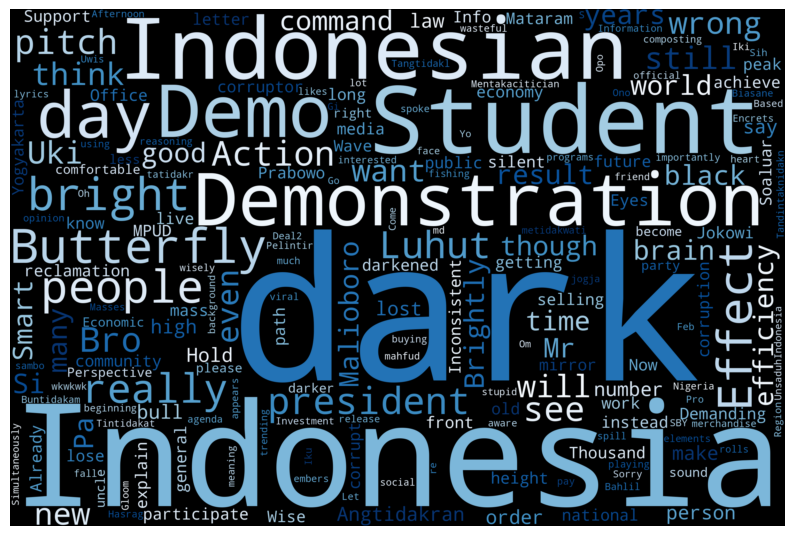

In [26]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

# Assuming 'tweet_english' or '0' is the correct column name
# Replace 'tweet_english' with the actual name if different or use data.columns[0] if it is first column.
all_words = ' '.join([tweets for tweets in data['tweet_english']])
#all_words = ' '.join([tweets for tweets in data[data.columns[0]]])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    random_state = 3,
    background_color='black',
    colormap="Blues_r",
    collocations = False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

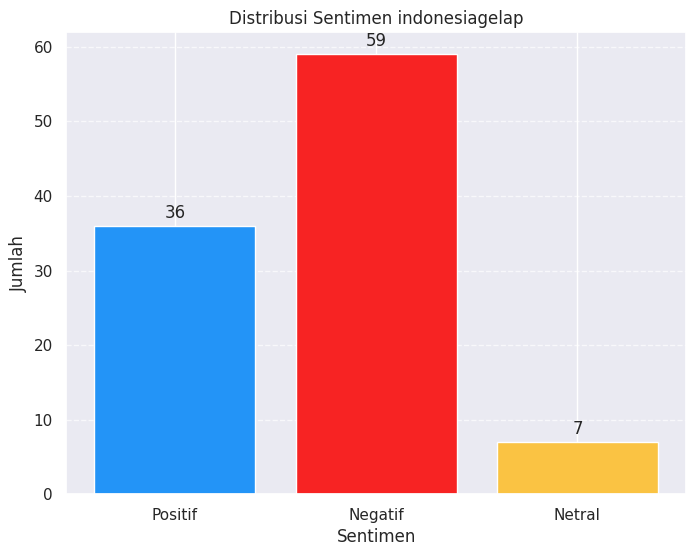

In [27]:
#visualisasi Sentimen

import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels,counts, title):
  fig, ax = plt.subplots(figsize=(8,6))
  bars = ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])

  for bar, count in zip(bars, counts):
      height = bar.get_height()
      ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width()/2, height),
                  xytext=(0,3),
                  textcoords='offset points',
                  ha='center',va='bottom')
  ax.grid(axis='y', linestyle='--',alpha=0.7)

  ax.set_xlabel('Sentimen')
  ax.set_ylabel('Jumlah')
  ax.set_title(title)

  plt.show()

show_bar_chart(labels,counts,'Distribusi Sentimen indonesiagelap')